In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('./Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

In [4]:
files = [file for file in os.listdir('./Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()                                     
for file in files:
    df = pd.read_csv('./Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [5]:
all_df = pd.read_csv('all_data.csv')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_df.shape

(186850, 6)

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
data = all_df.dropna()

### Add Month column

In [10]:
data['Month'] = data['Order Date'].str[0:2]

In [11]:
data1 = data[data['Order Date'].str[0:2]!= 'Or']
data1['Month'] = data1['Month'].astype('int64')
data1['Quantity Ordered'] = data1['Quantity Ordered'].astype('int64')
data1['Price Each'] = data1['Price Each'].astype('float64')

In [12]:
data1['Order Date'] = pd.to_datetime(data1['Order Date'], dayfirst=True)

### Add Sales Column

In [13]:
data1['Sales'] = data1['Quantity Ordered'] * data1['Price Each']

In [14]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add City column

In [15]:
def get_city(addrs):
    return addrs.split(',')[1]
def get_state(addrs):
    return addrs.split(',')[2].split(' ')[1]

data1['City'] = data1['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Q1. What was the best month for Sales? How much was earned that month?

In [66]:
result = data1.groupby('Month').sum()['Sales']
result.sort_values(ascending=False).head()

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
Name: Sales, dtype: float64

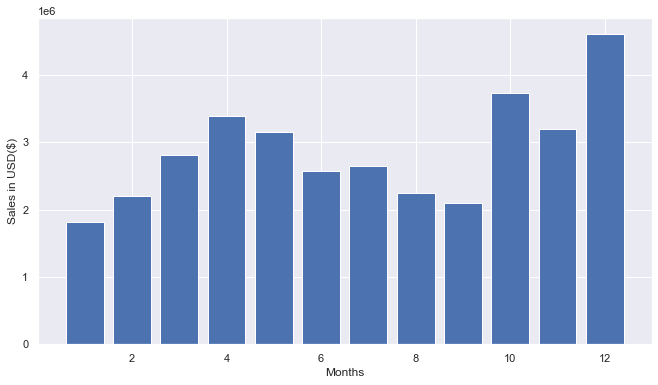

In [62]:
plt.figure(figsize=(11,6))
months = range(1,13)
plt.bar(months, result)
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.show()

### Q2. What city had the highest number of sales?

In [18]:
result = data1.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


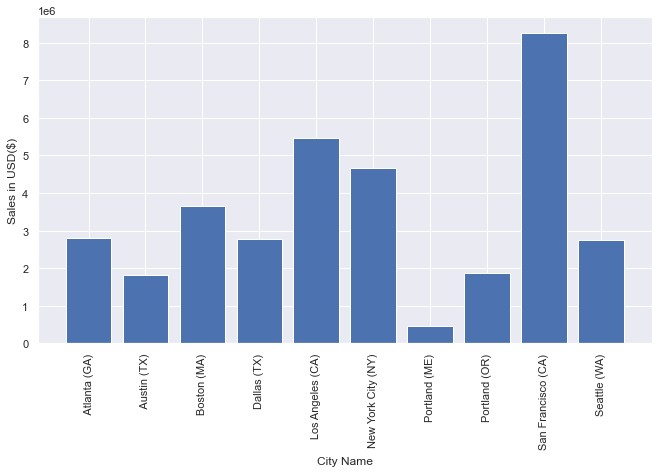

In [57]:
plt.figure(figsize=(11,6))
cities = [city for city, df in data1.groupby('City')]
plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('City Name')
plt.ylabel('Sales in USD($)')
plt.show()

### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
data1['Hour'] = data1['Order Date'].dt.hour

[]

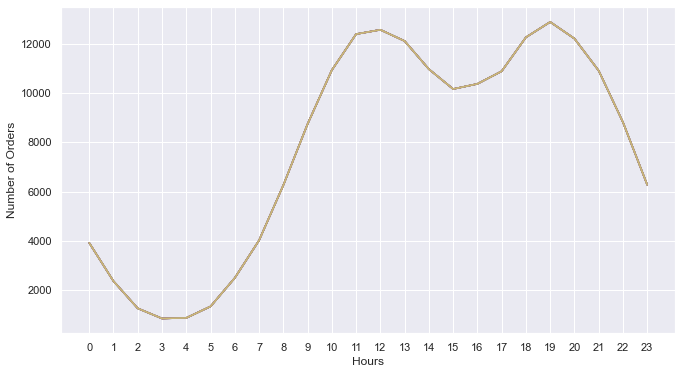

In [56]:
plt.figure(figsize=(11,6))
hours = [hour for hour, df in data1.groupby('Hour')]
plt.plot(hours, data1.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.plot()

# My recommendation is around 11am(11) or 7pm(19)  

### Q4. What products most ofter sold together?

In [36]:
df = data1[data1['Order ID'].duplicated(keep= False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5. What product sold the most? Why do you think it sold the most?

In [41]:
product_group = data1.groupby('Product').sum()['Quantity Ordered']
products = [product for product, df in data1.groupby('Product')]

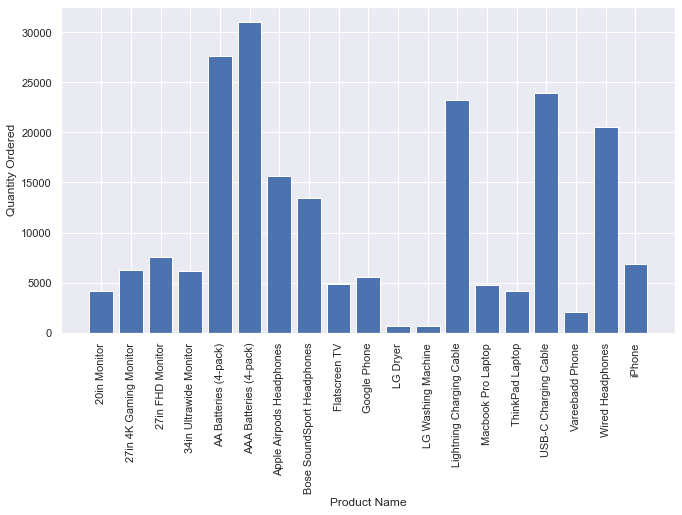

In [55]:
plt.figure(figsize=(11,6))
plt.bar(products, product_group)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()

# Hypothesis: AAA batteries are sold the most because of there cheap prices

#### To comfirm the hypothesis, we plot the prices in comparison with quantity ordered

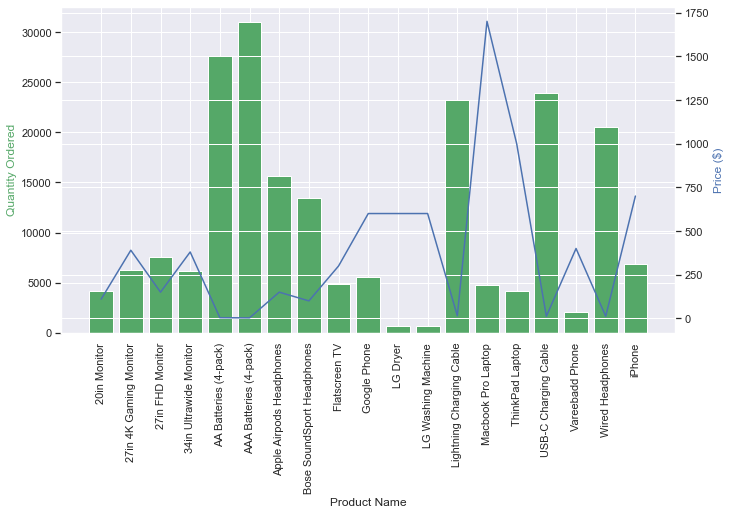

In [53]:
prices = data1.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(11,6))
ax2 = ax1.twinx()
ax1.bar(products, product_group, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical')
plt.show()

# It confirm our Hypothesis